# cd /Users/michealaderibigbe/Downloads/dataset

In [1]:
cd /Users/michealaderibigbe/Downloads/dataset/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/

/Users/michealaderibigbe/Downloads/dataset/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11


In [2]:
ls

Sample Submission.csv
Test Dataset.csv
Train Dataset .csv
Variable_Definitions.csv
catboost_info/
manifest-57036dccb7f7d3ba5a7ca81aa6d7b37b20240918-4983-168y3xs.json
submission.csv
submission2.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
%matplotlib inline

In [4]:
test=pd.read_csv('Test Dataset.csv') #importing our test dataset to jupyter notebook
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [5]:
train=pd.read_csv('Train Dataset .csv') #importing our train dataset to jupyter notebook
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [6]:
variable=pd.read_csv('Variable_Definitions.csv')
submission=pd.read_csv('Sample Submission.csv')

In [7]:
submission.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [8]:
variable

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [9]:
submission.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [10]:
test.info() #information about test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [11]:
train.info() #information about test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [12]:
test.shape #this indicate the dimension of the dataset with 2697 rows and 14 columns

(2697, 14)

In [13]:
test.isnull().count() #this is use to describe if their are missing value in the dataset

id          2697
age         2697
sex         2697
cp          2697
trestbps    2697
chol        2697
fbs         2697
restecg     2697
thalach     2697
exang       2697
oldpeak     2697
slope       2697
ca          2697
thal        2697
dtype: int64

In [14]:
test.describe() #this describes the statistical data of the test dataset

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,14939.832036,53.064516,0.488691,1.504264,146.384872,344.027809,0.497219,1.021135,135.993326,0.484613,3.142714,1.011494,2.032258,1.473489
std,2888.940621,14.350978,0.499965,1.112747,30.640580,127.265038,0.500085,0.811590,38.419913,0.499856,1.810003,0.814976,1.397353,1.120744
min,10000.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12455.000000,41.000000,0.000000,1.000000,121.000000,233.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000
50%,14854.000000,53.000000,0.000000,1.000000,147.000000,344.000000,0.000000,1.000000,136.000000,0.000000,3.200000,1.000000,2.000000,1.000000
75%,17465.000000,66.000000,1.000000,3.000000,172.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000
max,19999.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [15]:
train.isnull().sum() #This indication of the null values present in each columns

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
train.shape #train.shape is used to access the dimention of the train dataset which comprise of 7303 rows and 15 columns

(7303, 15)

In [17]:
#renaming columns names that does not match the two dataset
test.rename(columns={'id':'Id','age':'Age','sex':'Sex'}, inplace=True)

In [18]:
#concatenating the train and test dataframe
train["targ"]="train" 
test["targ"]="test"

dataset = pd.concat([train, test], ignore_index=True)

In [19]:
dataset.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0.0,train
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1.0,train
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1.0,train
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1.0,train


In [20]:
test.corr() #from the correlation information below, this indication overall we have a low correlation between columns

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Id,1.000000,0.045975,0.031353,-0.003892,0.007533,0.043725,0.025601,-0.000888,-0.019937,-0.000190,-0.018719,0.008147,0.011259,0.011036
Age,0.045975,1.000000,-0.030399,-0.006451,-0.023137,0.012965,-0.000285,-0.024894,0.018403,-0.021630,-0.001725,0.034727,-0.010462,0.020055
Sex,0.031353,-0.030399,1.000000,0.014255,0.007088,0.039497,-0.003464,-0.006267,0.009014,-0.004036,0.033735,-0.015612,-0.025228,-0.016588
cp,-0.003892,-0.006451,0.014255,1.000000,0.030206,-0.036535,0.003187,0.006266,-0.029203,-0.002049,-0.005284,0.000968,-0.046486,-0.012773
trestbps,0.007533,-0.023137,0.007088,0.030206,1.000000,-0.019751,-0.011138,-0.023074,-0.009206,-0.012812,-0.003291,-0.019502,0.000983,-0.003602
chol,0.043725,0.012965,0.039497,-0.036535,-0.019751,1.000000,0.047054,-0.004448,-0.024637,0.038924,-0.004587,-0.027072,-0.008296,0.010671
fbs,0.025601,-0.000285,-0.003464,0.003187,-0.011138,0.047054,1.000000,0.014310,0.002933,-0.007220,-0.003680,-0.004017,-0.014469,0.013932
restecg,-0.000888,-0.024894,-0.006267,0.006266,-0.023074,-0.004448,0.014310,1.000000,-0.026463,0.005831,-0.001751,0.002997,0.011173,-0.008559
thalach,-0.019937,0.018403,0.009014,-0.029203,-0.009206,-0.024637,0.002933,-0.026463,1.000000,0.006639,0.003055,0.001436,0.015142,-0.005207
exang,-0.000190,-0.021630,-0.004036,-0.002049,-0.012812,0.038924,-0.007220,0.005831,0.006639,1.000000,-0.004562,0.011816,0.020094,0.021949


In [21]:
train.corr() #similar to test data, their are also low correlation in the train dataset

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
Age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
Sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


In [22]:
dataset.isnull().sum() #checking for null values in the datasets

Id             0
Age            0
Sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target      2697
targ           0
dtype: int64

In [23]:
dataset.head() #list first five rows of the dataset

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0.0,train
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1.0,train
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1.0,train
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1.0,train


In [24]:
dataset.shape

(10000, 16)

<AxesSubplot:>

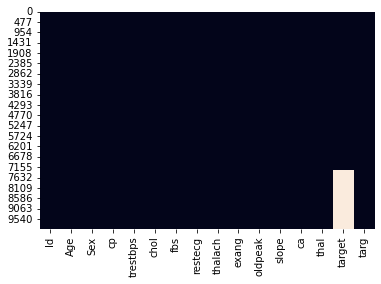

In [25]:
sns.heatmap(dataset.isnull(), cbar=False) #checking null values in the concatenated dataset

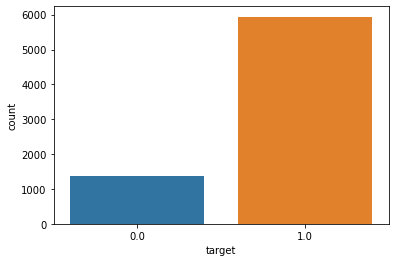

In [26]:
sns.countplot(x=dataset['target']) #A barchart of people without heart disease vs people wuth disease
plt.show()

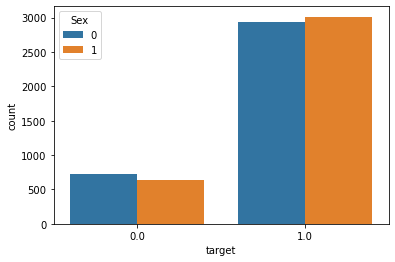

In [27]:
sns.countplot(x='target', hue='Sex', data=dataset) #A chart of diseases carrier based on their gender
plt.show()

The bar plot above indicate that their are way high male and female in close range but female slightly higher who are affected by heart diseases, while
while the number of the healthy male are slightly higher than than of female

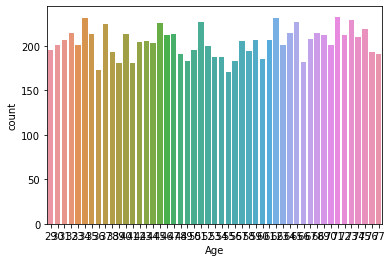

In [28]:
sns.countplot(x='Age', data=dataset)
plt.show()

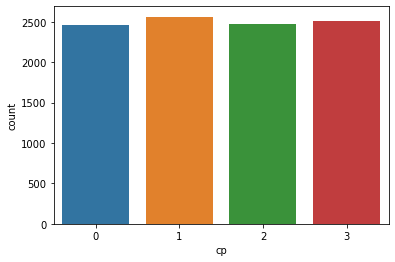

In [29]:
sns.countplot(x='cp', data=dataset) #A bar plot of type of chest pains
plt.show()

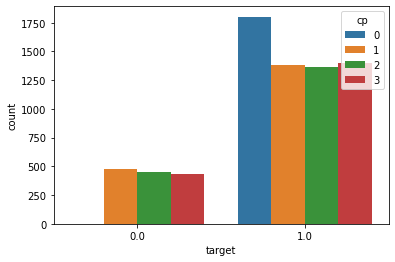

In [30]:
sns.countplot(x='target', hue='cp', data=dataset) #This is a plot of chest pain(cp) with the target
plt.show()

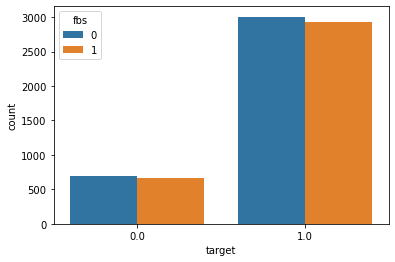

In [31]:
sns.countplot(x='target', hue='fbs', data=dataset)
plt.show()

In [32]:
train['ca'].unique()

array([4, 1, 3, 2, 0])

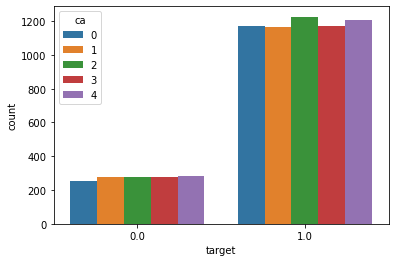

In [33]:
sns.countplot(x='target', hue='ca', data=dataset)
plt.show()

In [34]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,train
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,train
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,train
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,train
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,train


In [35]:
train['exang'].unique()

array([0, 1])

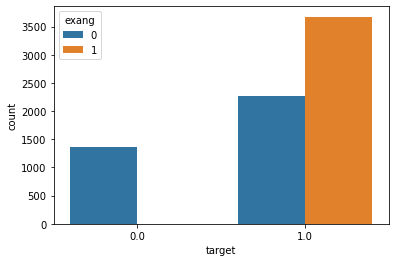

In [36]:
sns.countplot(x='target', hue='exang', data=dataset) #Here is a plot of argina during exercise against the target variable.
plt.show()

## Feature Engineering

In [37]:
# function to group the ages into bins
def group_age(x):
    if x < 30:
        return 'Young'
    elif 30 <= x < 40:
        return 'Adult'
    elif 40 <= x < 60:
        return 'Middle Age'
    else:
        return 'Old'

dataset['Age_bin'] = dataset['Age'].apply(group_age)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        10000 non-null  int64  
 1   Age       10000 non-null  int64  
 2   Sex       10000 non-null  int64  
 3   cp        10000 non-null  int64  
 4   trestbps  10000 non-null  int64  
 5   chol      10000 non-null  int64  
 6   fbs       10000 non-null  int64  
 7   restecg   10000 non-null  int64  
 8   thalach   10000 non-null  int64  
 9   exang     10000 non-null  int64  
 10  oldpeak   10000 non-null  float64
 11  slope     10000 non-null  int64  
 12  ca        10000 non-null  int64  
 13  thal      10000 non-null  int64  
 14  target    7303 non-null   float64
 15  targ      10000 non-null  object 
 16  Age_bin   10000 non-null  object 
dtypes: float64(2), int64(13), object(2)
memory usage: 1.3+ MB


In [39]:
dataset.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ,Age_bin
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train,Adult
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0.0,train,Middle Age
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1.0,train,Adult
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1.0,train,Old
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1.0,train,Adult


In [40]:
# Define the categorical features for easy data manipulation and EDA
cat_cols = ['Sex', 'cp', 'fbs', 'exang', 'slope']
for col in cat_cols:
    dataset[col] = dataset[col].astype('object')

In [41]:
#label encoding the categorical columns
cat_cols.append('Age_bin')
for col in cat_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [42]:
dataset.head(10)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,targ,Age_bin
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1.0,train,0
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0.0,train,1
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1.0,train,0
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1.0,train,2
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1.0,train,0
5,13835,69,1,3,164,280,0,0,88,0,5.0,0,0,0,0.0,train,2
6,16226,44,0,2,134,129,0,0,71,1,5.2,0,3,3,1.0,train,1
7,19944,32,1,0,164,341,1,1,93,1,5.4,0,3,0,1.0,train,0
8,12028,36,0,0,199,198,1,2,151,1,2.2,2,0,0,1.0,train,0
9,18599,60,1,1,126,389,0,1,79,0,2.6,2,0,2,1.0,train,2


In [43]:
# splitting the data back to train and test and dropping the unnecessary columns
train_data = dataset[dataset["targ"] == "train"].drop(["targ", "Age", "Id","chol","thalach",], axis=1)
test_data = dataset[dataset["targ"] == "test"].drop(["targ", "target", "Age", "Id","chol","thalach",], axis=1)

In [44]:
X=train_data.drop(columns=['target',])
X.head()

,Sex,cp,trestbps,fbs,restecg,exang,oldpeak,slope,ca,thal,Age_bin
0,0,1,158,1,0,0,1.5,1,4,1,0
1,1,2,198,0,1,0,0.8,2,1,0,1
2,1,2,101,1,0,0,2.1,1,3,1,0
3,0,0,113,1,2,1,4.9,0,2,2,2
4,1,2,139,1,1,1,0.9,2,4,0,0


In [45]:
y=train_data['target']
print(y.value_counts())

1.0    5941
0.0    1362
Name: target, dtype: int64


In [46]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [49]:
X_train.shape, X_test.shape

((5988, 11), (1315, 11))

In [50]:
y_train.shape, y_test.shape

((5988,), (1315,))

In [51]:
# resampling the data using SMOTE because the target variable is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

 #Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
1.0    5941
0.0    1362
Name: target, dtype: int64

Class distribution after SMOTE:
1.0    4859
0.0    4859
Name: target, dtype: int64


In [52]:
X_train.shape, y_train.shape

((5988, 11), (5988,))

In [53]:
X_resampled.shape, y_resampled.shape

((9718, 11), (9718,))

In [54]:
print(X_resampled.std())

Sex          0.492076
cp           0.986907
trestbps    30.888608
fbs          0.492479
restecg      0.792439
exang        0.461940
oldpeak      1.762732
slope        0.792565
ca           1.375223
thal         1.097519
Age_bin      0.755352
dtype: float64


In [55]:
# Step 4: Feature Scaling (Standardization)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

### MODELLING

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
classifier=LogisticRegression(random_state=1000)
classifier.fit(X_resampled,y_resampled)

/Users/michealaderibigbe/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

In [58]:
# 5.3 Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.46      0.94      0.62       233
         1.0       0.98      0.76      0.86      1082

    accuracy                           0.79      1315
   macro avg       0.72      0.85      0.74      1315
weighted avg       0.89      0.79      0.82      1315



In [59]:
# Evaluate on train and test data
acc_train = classifier.score(X_resampled, y_resampled)
acc_test = classifier.score(X_test, y_test)

print("Training Accuracy:", acc_train)
print("Test Accuracy:", acc_test)

Training Accuracy: 0.8453385470261371
Test Accuracy: 0.7946768060836502


In [60]:
confusion_matrix(y_test,y_pred)

array([[219,  14],
       [256, 826]])

In [61]:
test_pred = classifier.predict(test_data)

In [62]:
test_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [63]:
submission.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [64]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': submission['Id'],
    'Target': test_pred.astype(int)
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

### Catboost Algorithm

In [68]:
# Identify categorical features
cat_features = ['Sex', 'cp', 'fbs', 'exang', 'slope',]
for col in cat_cols:
    dataset[col] = dataset[col].astype('object')

# Initialize CatBoost Classifier
model = CatBoostClassifier(cat_features=cat_features, iterations=100, learning_rate=0.2, depth=3, verbose=0)

# Train the model
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

#train_data['target']

In [69]:
# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


In [70]:
test_predcat = model.predict(test_data)  #making predictions on the test data

In [71]:
test_predcat

array([1., 1., 1., ..., 1., 1., 0.])

In [72]:
submission.tail(20) #checking the first five rows of the submission dataframe

,ID,Target
2677,11790,1
2678,16206,0
2679,17824,1
2680,10424,0
2681,12532,0
2682,18564,0
2683,11271,1
2684,19116,1
2685,15342,1
2686,15905,1


In [73]:
submission2=pd.read_csv('Sample Submission.csv')

In [74]:
submission2.tail(20)

,Id
2677,11790
2678,16206
2679,17824
2680,10424
2681,12532
2682,18564
2683,11271
2684,19116
2685,15342
2686,15905


In [75]:
# Create a submission DataFrame
submission2 = pd.DataFrame({
    'ID': submission2['Id'],
    'Target': test_predcat.astype(int)  # Convert Target to whole numbers (integers)
})

# Save the submission DataFrame to a CSV file
submission2.to_csv('submission2.csv', index=False)

In [76]:
submission2.head()

,ID,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
